## 2D Isotropic Quantum Harmonic Oscillator - Dynamic Simulation
### Case 2.2 - Finite Superposition of Polar Eigenstates

<br>
Static simulation of the wave function given by the initial superposition

$$ \Psi(\mathbf{r},0) = A \left( \frac{1}{3} \psi_{0}^{2} - \frac{2 \mathrm{i}}{5} \psi_{1}^{-1} + \frac{1}{2} \psi_{2}^{0} \right) $$

at time $t = 0$ .

This notebook contains graphs of:
* the probability density function of polar eigenstates $\psi_{2}^{1}$ and $\psi_{3}^{2}$ ,
* the phase of polar eigenstates $\psi_{2}^{1}$ and $\psi_{3}^{2}$ ,
* the initial probability density function $|\Psi(\mathbf{r},0)|^2$ ,
* the phase of the initial wave function $\arg \Psi(\mathbf{r},0)$ .


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Polar eigenstates $\psi_{2}^{1}$ and $\psi_{3}^{2}$


In [2]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
r_min = 0
r_max = 4 * math.sqrt(2)
r_N = 501
r = np.linspace(r_min, r_max, r_N)

theta_min = 0
theta_max = 2 * math.pi
theta_N = 501
theta = np.linspace(theta_min, theta_max, theta_N)

R, THETA = np.meshgrid(r, theta)
X, Y = pol2cart(R, THETA)

# Compute eigenstates
N = 2
n = np.vstack(np.array([2, 3]), dtype=object)
m = np.vstack(np.array([1, 2]), dtype=object)
eigenfuns = np.zeros((N, np.size(theta), np.size(r)), dtype=np.complex128)

for i in range(N):
    eigenfuns[i] = qho.eigen2D_pol(s, n[i][0], m[i][0], R, THETA)


C:\Users\User\AppData\Local\Temp\ipykernel_4912\2308666051.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, abs2(eigenfuns[i]), cmap='inferno')


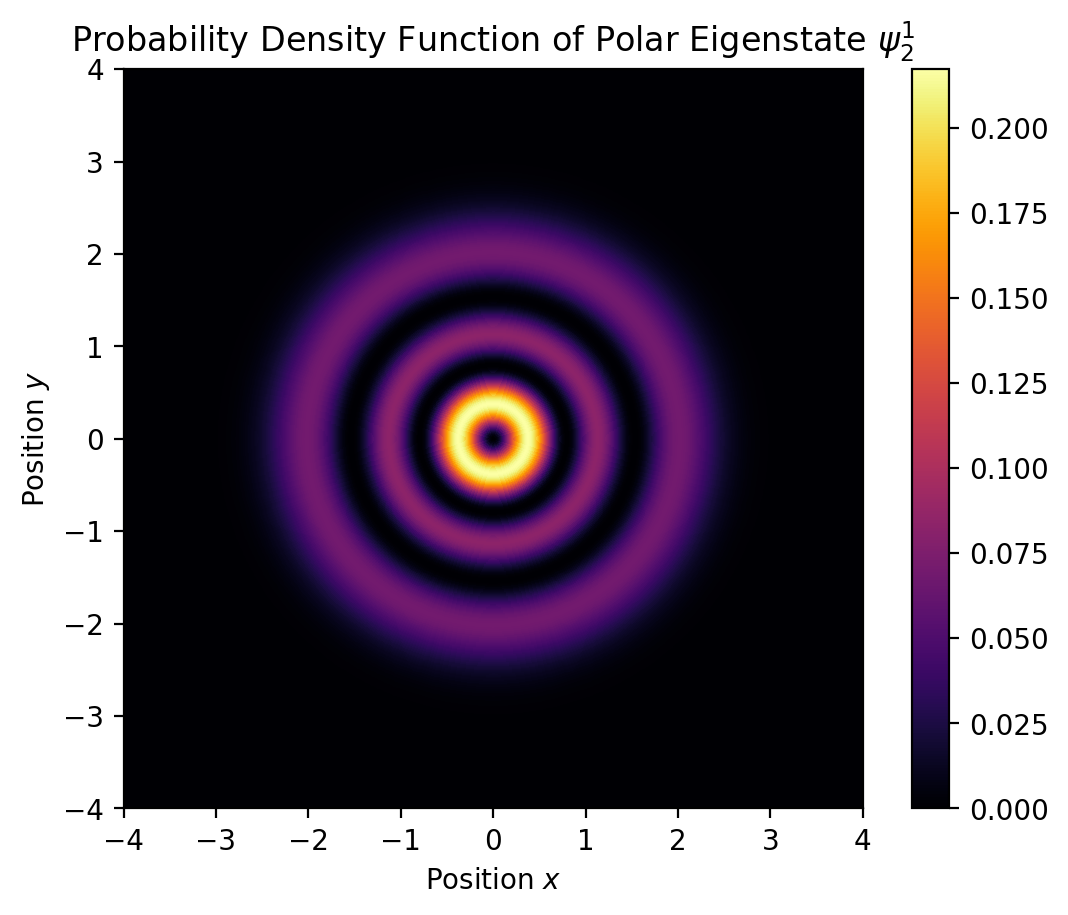

In [3]:
# Plot probability density function of polar eigenstates
i = 0

fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, abs2(eigenfuns[i]), cmap='inferno')
ax.set_title(rf'Probability Density Function of Polar Eigenstate $\psi_{n[i][0]}^{m[i][0]}$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4912\1673914534.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, np.angle(eigenfuns[i]), cmap='hsv', vmin=-math.pi, vmax=math.pi)


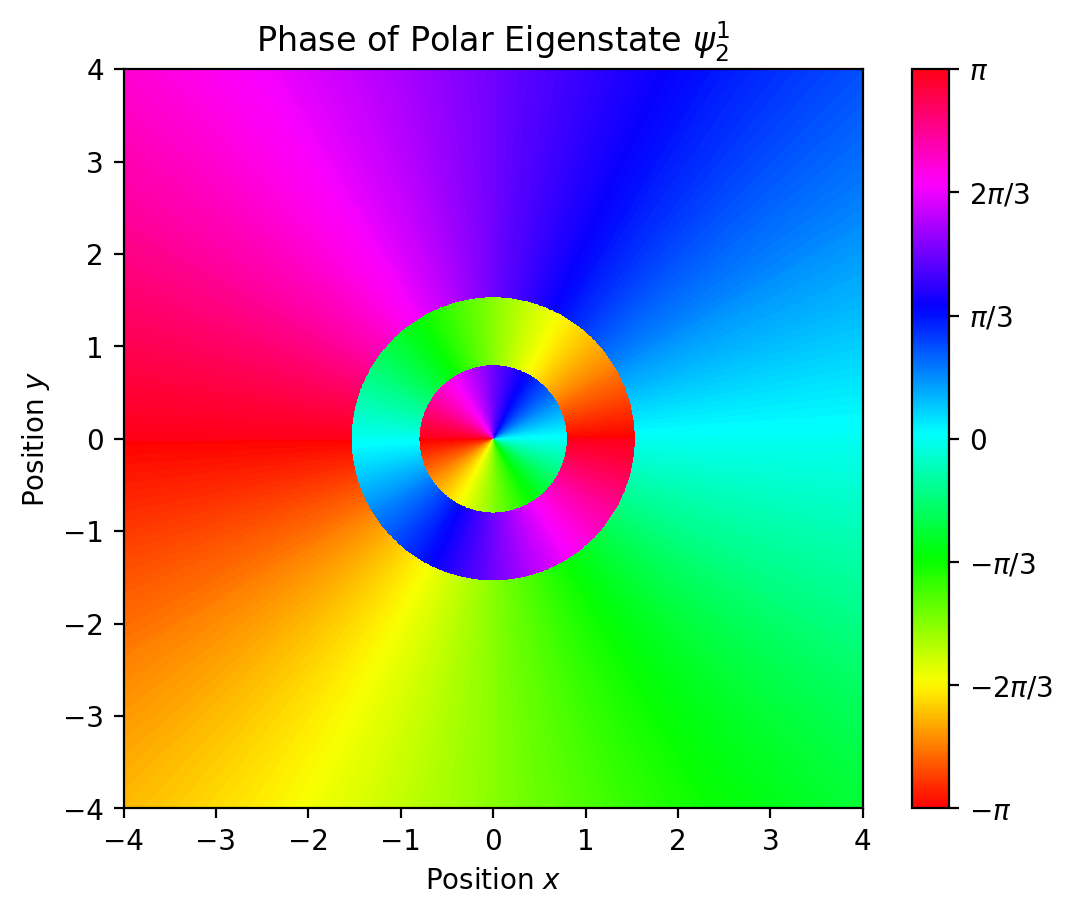

In [4]:
# Plot phase of polar eigenstates
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, np.angle(eigenfuns[i]), cmap='hsv', vmin=-math.pi, vmax=math.pi)
ax.set_title(rf'Phase of Polar Eigenstate $\psi_{n[i][0]}^{m[i][0]}$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

cbar = fig.colorbar(pcmesh, ax=ax, ticks=np.linspace(-math.pi, math.pi, 7))
cbar.set_ticklabels([r'$-\pi$', r'$-2\pi/3$', r'$-\pi/3$', r'$0$', r'$\pi/3$', r'$2\pi/3$', r'$\pi$'])

plt.show()


#### Initialize state $\Psi(\mathbf{r},0)$


In [5]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
r_min = 1e-5                            # Not zero to avoid division error
r_max = 3 * math.sqrt(2)
r_N = 501
r = np.linspace(r_min, r_max, r_N)

theta_min = 0
theta_max = 2 * math.pi
theta_N = 501
theta = np.linspace(theta_min, theta_max, theta_N)

R, THETA = np.meshgrid(r, theta)
X, Y = pol2cart(R, THETA)

# Compute eigenstates
N = 3
n = np.vstack(np.array([0,  1, 2]), dtype=object)
m = np.vstack(np.array([2, -1, 0]), dtype=object)
eigenfuns = np.zeros((N, np.size(theta), np.size(r)), dtype=np.complex128)

for i in range(N):
    eigenfuns[i] = qho.eigen2D_pol(s, n[i][0], m[i][0], R, THETA)

# Initialize wave function
A = 30 / math.sqrt(469)
psi0 = A * (1/3*eigenfuns[0] - 2j/5*eigenfuns[1] + 1/2*eigenfuns[2])

# Compute eigenstate coefficients
c = A * np.vstack(np.array([1/3, -2j/5, 1/2]))

# Verify normalization of probability density function
print(f'Integral of |Ψ(r,0)|² = {np.trapz(np.trapz(abs2(psi0) * R, x=r, axis=1), x=theta)}')
print()


Integral of |Ψ(r,0)|² = 0.9999884854386963



C:\Users\User\AppData\Local\Temp\ipykernel_672\969631180.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, abs2(psi0), cmap='inferno', vmin=0)


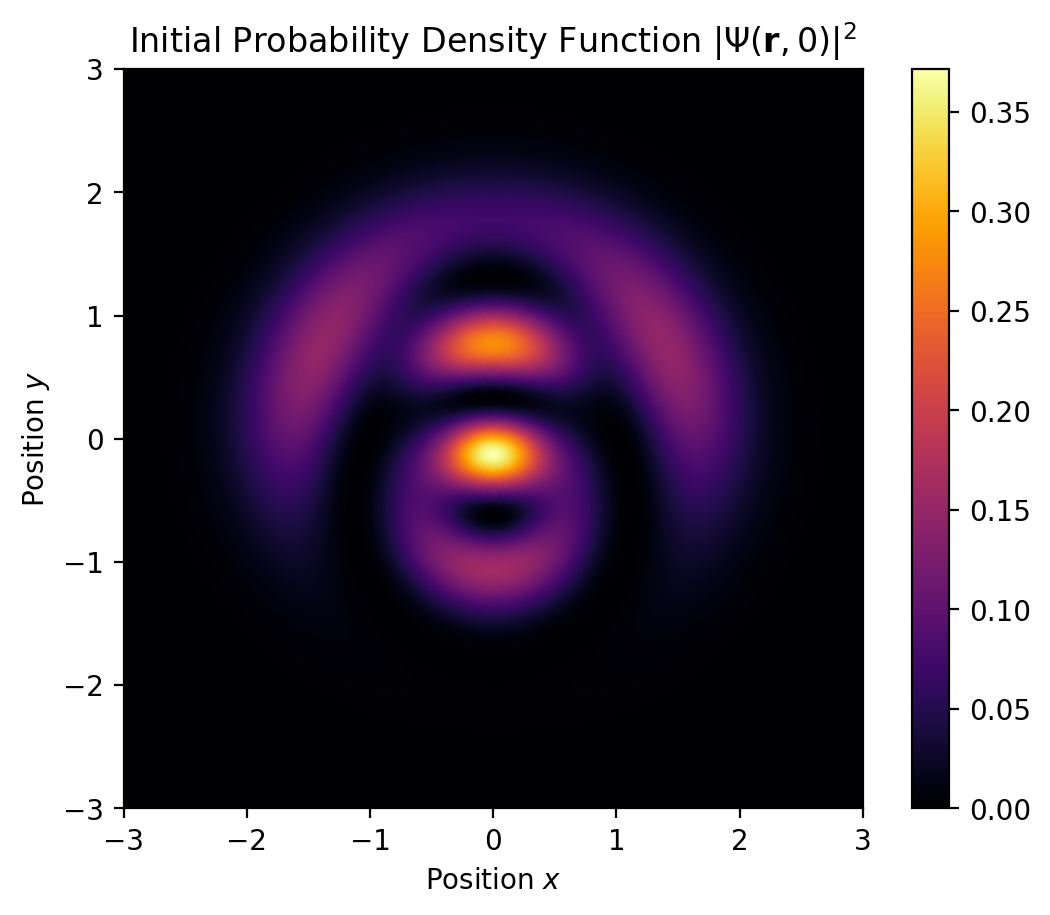

In [9]:
# Plot initial probability density function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, abs2(psi0), cmap='inferno', vmin=0)
ax.set_title(r'Initial Probability Density Function $|\Psi(\mathbf{r},0)|^2$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Phase of initial wave function $\arg \Psi(\mathbf{r},0)$


C:\Users\User\AppData\Local\Temp\ipykernel_672\1137159346.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X, Y, np.angle(psi0), cmap='hsv', vmin=-math.pi, vmax=math.pi)


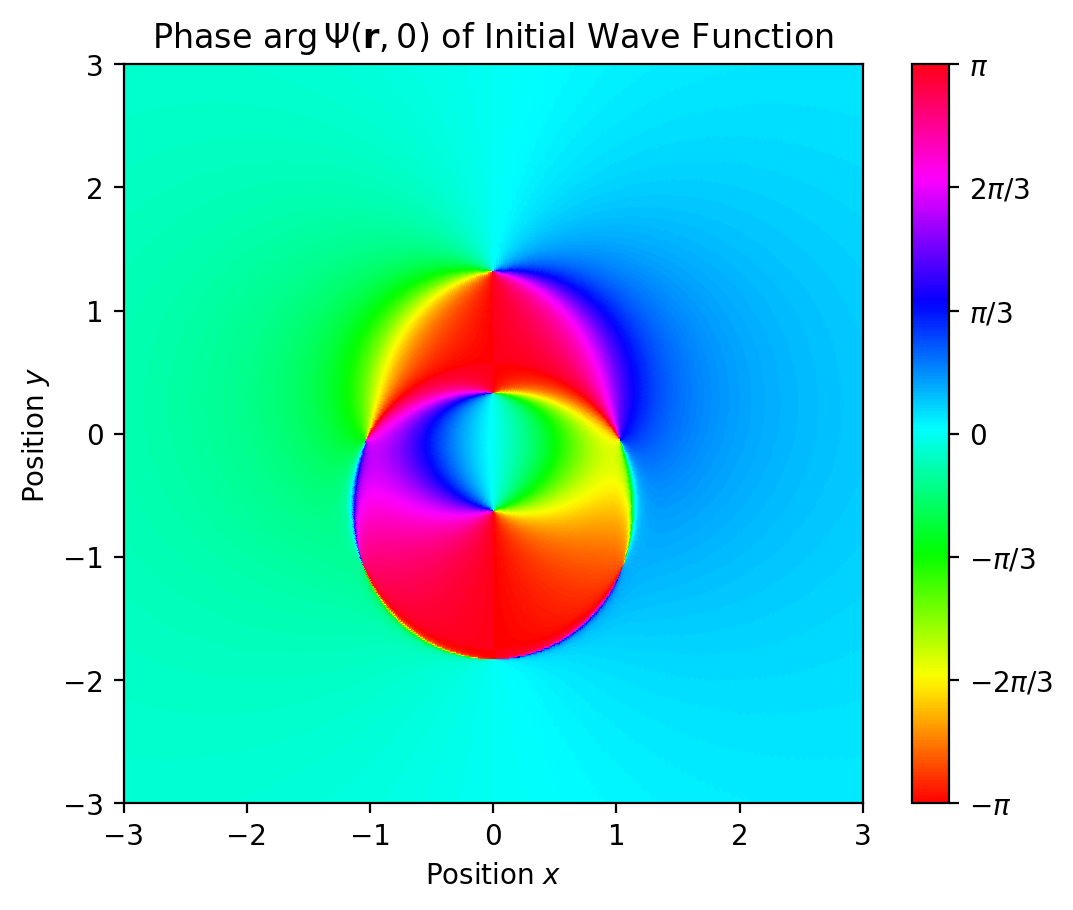

In [7]:
# Plot phase of initial wave function
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X, Y, np.angle(psi0), cmap='hsv', vmin=-math.pi, vmax=math.pi)
ax.set_title(r'Phase $\arg \Psi(\mathbf{r},0)$ of Initial Wave Function')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(np.array([-r_max, r_max]) / math.sqrt(2)), ax.set_ylim(np.array([-r_max, r_max]) / math.sqrt(2))
ax.set_aspect('equal', adjustable='box')

cbar = fig.colorbar(pcmesh, ax=ax, ticks=np.linspace(-math.pi, math.pi, 7))
cbar.set_ticklabels([r'$-\pi$', r'$-2\pi/3$', r'$-\pi/3$', r'$0$', r'$\pi/3$', r'$2\pi/3$', r'$\pi$'])

plt.show()


#### Expectation value of kinetic energy $\langle T \rangle$

From the definition $\braket{T} = \braket{\Psi|-\frac{\hbar}{2M} \nabla^2|\Psi}$, we derive $\braket{T} = \frac{\hbar}{2m} \braket{\nabla \Psi|\nabla \Psi}$ .


In [8]:
# Compute expectation value of kinetic energy
grad_theta, grad_r = np.gradient(psi0, theta, r)
expect_T = hbar**2 / (2 * M) * np.trapz(np.trapz((abs2(grad_r) + abs2(1 / R * grad_theta)) * R, x=r, axis=1), x=theta)

print(f'Expectation value of T = {expect_T}')
print()


Expectation value of T = 2.132749643264984

